In [1]:
from scipy import stats
from matplotlib.pyplot import *
from numpy import *
import fastIsing, scipy
import networkx as nx, IO, multiprocessing as mp
from tqdm import tqdm_notebook as tqdm
import infcy
# %matplotlib 
dataDir = 'Psycho' # relative path careful
df    = IO.readCSV('{}/Graph_min1_1.csv'.format(dataDir), header = 0, index_col = 0)
h     = IO.readCSV('{}/External_min1_1.csv'.format(dataDir), header = 0, index_col = 0)
graph   = nx.from_pandas_adjacency(df) 
# graph = nx.random_graphs.barabasi_albert_graph(10, 3)
# graph = nx.grid_2d_graph(2, 2, periodic = True)
# graph  = nx.path_graph(5, nx.DiGraph())
# graph.add_edge(0, 0)
# graph  = nx.path_graph(5, nx.DiGraph())
graph = nx.star_graph(4)
# graph = nx.grid_2d_graph(4,4)
graph  = nx.path_graph(2, nx.DiGraph())
graph.add_edge(0, 0); graph.add_edge(1, 2)

# pulse graph.edge_attr_dict_factory
# nudge  = 0
# target = 1
# for node in graph.nodes():
#     pulse[node] = nudge if node == target else 0
# nx.set_node_attributes(graph, pulse, 'nudges')
temp  = 1
model = fastIsing.Ising(graph, temp, False, updateType= 'single', verbose = False, magSide = 'neg')

temps = linspace(0, 10, 50)
mag, sus = model.matchMagnetization(temps =  temps, n = 1000, burninSamples = 100)
func = lambda x, a, b, c, d :  a / (1 + exp(b * (x - c))) + d # tanh(-a * x)* b + c
a, b = scipy.optimize.curve_fit(func, temps, mag, maxfev = 10000)
xx = linspace(0, max(temps))
fig, ax = subplots();
ax.scatter(temps,  mag)
ax.plot(xx, func(xx, *a), 'k--')

match = .8 * max(mag)
fr  = lambda x, a, b : func(x, *a) - b
rr  = scipy.optimize.root(fr, 0, args = (a, match))
ax.scatter(rr.x, func(rr.x, *a), c = 'red')


model.t = rr.x
setp(ax, **dict(xlabel = 'Temperature', ylabel = '<abs(M)>'))
show()


No burnin used


/home/casper/miniconda3/lib/python3.7/multiprocessing/pool.py:47: RuntimeWarning: invalid value encountered in double_scalars
  return list(itertools.starmap(args[0], args[1]))


<Figure size 640x480 with 1 Axes>

In [2]:
N      = int(1e4)
delta  = 5 # look back until
res, cc, cond, state, px,  H = infcy.reverseCalculation(N, model, delta, {})


print(H)


 29%|██▉       | 2902/10000 [00:00<00:00, 12037.83it/s]

Simulation parameters
 number of samples: 10000
 step size 1
 pulse : {}


  9%|▉         | 918/9996 [00:00<00:01, 8923.89it/s]

((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 

 42%|████▏     | 4237/9996 [00:00<00:00, 10251.56it/s]


((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6,

 64%|██████▍   | 6442/9996 [00:00<00:00, 10286.29it/s]

((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 

 88%|████████▊ | 8792/9996 [00:00<00:00, 11007.77it/s]


((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6,

  0%|          | 0/4 [00:00<?, ?it/s]/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 4/4 [00:00<00:00, 5553.53it/s]

((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 3), array([ True,  True,  True]))
((6, 3), (6, 

In [3]:
a = array([i for i in range(3)])
print(len(a))

a[0:3]

3


array([0, 1, 2])

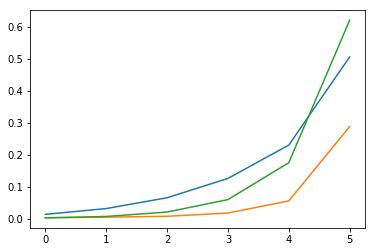

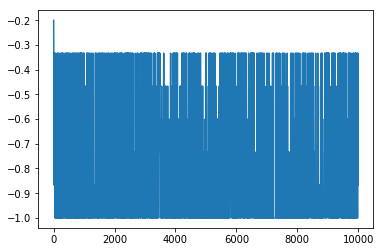

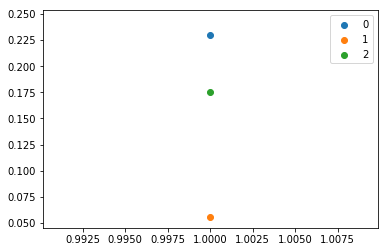

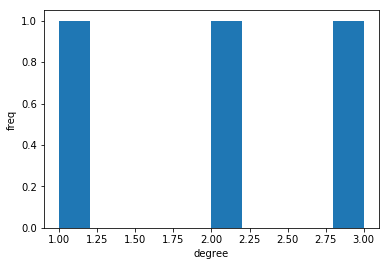

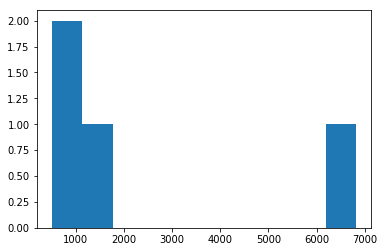

int16


In [4]:
# plot mi
fig, ax = subplots(); ax.plot(H);
# ax.set_yscale('log')
# ax.set_xscale('log')

yy = res.mean(1)
N  = 5
xx = convolve(yy, np.ones((N,))/N, mode='valid')
fig, ax = subplots(); ax.plot(xx) #
fig, ax = subplots()
for node in model.nodeIDs:
    deg = len(model.edgeData[node])
    ax.scatter(deg, H[-2, node], label = node)
ax.legend(bbox_to_anchor = (1, 1))
   
fig, ax = subplots()
ax.hist(list(dict(nx.degree(graph)).values()))
setp(ax, **dict(xlabel = 'degree', ylabel = 'freq'));
fig, ax = subplots(); ax.hist(cc.values())
show()

print(res.dtype)

In [5]:
# showing hellinger distance over time
colors = cm.tab20(arange(model.nNodes))
hd = lambda x, y: linalg.norm( sqrt(x) - sqrt (y), axis = -1) / sqrt(2)
d = zeros(H.shape)
for key, value in cond.items():
    x = value[..., None] / cc[key]
    d += hd(x,  1 - x)
d /= len(cond)


fig, ax = subplots(); 
[ax.plot(i, color = c) for i, c in zip(d.T, colors)]
ax.set_title('hellinger distance over time')
ax.set_xlim(len(x) - 15, len(x))

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [ ]:
from scipy import optimize
func = lambda x, a, b, c, d, e, f : a + b*exp(-c*x) + d * exp(-e * (x-f))
f2   = lambda x, a, b : func(x, *a) - b
fig, ax = subplots(figsize = (10, 10))
s = 0
idt = zeros((model.nNodes))
theta = 1e-3
colors = cm.tab20(arange(model.nNodes))
for idx, y in enumerate(H.T):
    y = y[::-1]
    x = arange(len(y))
    xx = linspace(0, 20, 1000)
    try:
        a, b = optimize.curve_fit(func, x,  y, maxfev = 100000) # fit
        
        ax.plot(xx, func(xx, *a), '--', color = colors[idx], alpha = 1) # plot fit
        
        findThis = a[0] + theta
        r  = optimize.root(f2,  x0 = 0, args = (a, findThis))
        rot = r.x if findThis < max(y) else 0

        print(a[0], rot, func(rot, *a))
        idt[idx] = rot
        ax.scatter(rot, func(rot, *a), color = colors[idx], s = 150, marker = '^', label = idx) # plot root 1
        s += 1
    except Exception as e : print(e)
    ax.scatter(x, y, color = colors[idx], s = 40)
ax.legend()
print(s / model.nNodes * 100)
ax.set_xlim(0,40)
ax.set_xlim(0, 3)
# ax.set_ylim(0, 1)
# ax.set_xscale('log')
# ax.set_yscale('log')

show()

In [ ]:
imshow(log(H.T))


In [ ]:
fig, ax = subplots()
for node, deg in model.graph.degree():
    idx = model.mapping[node]
    ax.scatter(deg, idt[idx], c = colors[idx])
# ax.set_ylim(0, -5)
# axx.set_ylim(0, -5)
# ax.set_yscale('log')



In [ ]:
model.nudges
